In [1]:
from openff.toolkit.topology import Molecule

**Note**: The content below demonstrates usage of `nglview` with `openforcefield`. This can be tricky to get working. Install with:

    conda install -c conda-forge nglview
    
And configure for use with Jupyter with:

    jupyter-nbextension enable nglview --py --sys-prefix
    
To use with Jupyterlab, configure with:

    jupyter labextension install  nglview-js-widgets
    jupyter-labextension install @jupyter-widgets/jupyterlab-manager

# Built-in visualizations in `openforcefield`

PR [#560](https://github.com/openforcefield/openforcefield/pull/560) introduced rich representation for the `Molecule` objects. This means you can visualize them in your Jupyter Notebooks.

We have implemented three backends:
- rdkit
- openeye
- nglview (requires conformers)

There are two ways to invoke the visualization:
- implicitly, by _evaluating_ the object in a cell
- explicitly, by calling `Molecule.visualize()`

_Implicit_ visualization will try to use `nglview` if there are conformers and fall back to `rdkit` and `openeye` (in that order) if they are not available.

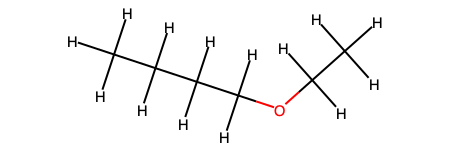

In [2]:
m = Molecule.from_smiles("CCCCOCC")
m

The regular `display()` call works on `Molecule` objects too.

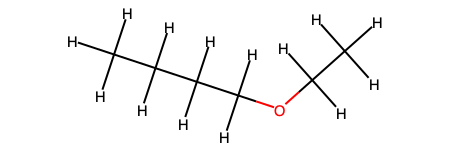

In [3]:
display(m)

_Explicit_ visualization works as one would expect:

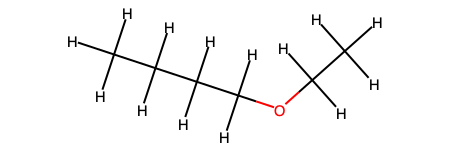

In [4]:
m.visualize()

This method can take a `backend` parameter, which defaults to `rdkit`:

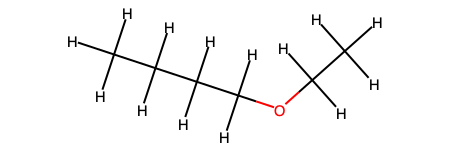

In [5]:
m.visualize(backend="rdkit")

`openeye` can also be used, if available:

In [6]:
try:
    import openeye

    m.visualize(backend="openeye")
except ImportError:
    print('Visualizing with `backend="openeye"` requires the OpenEye Toolkits')

`nglview`, if installed, can only be used if conformers have been generated:

In [7]:
try:
    m.visualize(backend="nglview")  # this will fail because we have no conformers yet
except ValueError as excinfo:
    # Catch the exception and print its message
    print(str(excinfo))

Visualizing with NGLview requires that the molecule has conformers.


But, once you generate them, it works! You can zoom in/out, rotate and translate the molecule. You can even inspect the different conformers (if available) using the trajectory player:

In [8]:
m.generate_conformers()
m.visualize(backend="nglview")

NGLWidget(max_frame=2)

For example, a benzene ring will not have multiple conformers, so you won't see the trajectory player.

In [9]:
n = Molecule.from_smiles("c1ccccc1")
n.generate_conformers()
n

NGLWidget()

Notice that, once conformers are available, the implicit representation will use `nglview` to provide a 3D visualization.